In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  8 10:54:30 2021
Modified Mon Mar 11 10:03 2024
@author: batasoy
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from collections import Counter
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

db = pd.read_csv('modes.csv')

In [3]:
db.head()

,user,Start Time,End Time,Class,xmin,ymin,zmin,xmax,ymax,zmax,xmean,ymean,zmean,xstd,ystd,zstd
0,a526f3566e9c9024dfa7378eb4291d787a09fd37,2018-04-14 08:39:00,2018-04-14 08:39:05,car,9.100000,-0.177222,2.914167,9.319474,1.823158,3.394375,9.197301,0.680411,3.147691,0.083206,0.848583,0.218015
1,dd82e3df4bebc74ed6b67877be79e29f401c16a3,2019-05-27 06:11:39,2019-05-27 06:11:44,car,-3.102917,0.505208,9.358878,-2.989388,0.940101,9.446250,-3.034444,0.772117,9.399396,0.047974,0.190513,0.037906
2,d429974540bfd38c3367fe9f0c8682775ff4fa18,2018-04-19 09:00:56,2018-04-19 09:01:01,car,1.140000,-1.916667,9.034000,2.207333,-1.138000,9.796667,1.588895,-1.420076,9.436495,0.462475,0.295181,0.286873
3,cace4ec0999436917986b4fa6e9317262c897bc2,2019-05-28 13:12:05,2019-05-28 13:12:10,car,6.880200,3.253137,6.115000,7.112941,3.365510,6.210600,7.039480,3.302962,6.174118,0.095806,0.042367,0.037818
4,d429974540bfd38c3367fe9f0c8682775ff4fa18,2018-04-19 13:24:36,2018-04-19 13:24:41,car,-0.282800,0.137500,8.404898,1.155000,4.941020,10.076667,0.355344,2.458931,9.147477,0.626277,2.448191,0.647715


In [4]:
# %% Training and test data split: Splitting the dataset into training, validation, and test data set using 60:20:20 split for train: validation: test.

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report

db.head()

#X = db.iloc[:,4:] 
X = db[['xmin', 'ymin', 'zmin', 'xmean', 'ymean', 'zmean', 'xstd', 'ystd', 'zstd']].values
#you can play with using less features to see the impact on the accuracy 
#X = data[['xmean', 'ymean', 'zmean', 'xstd', 'ystd', 'zstd']].values
#X = data[['xstd', 'zstd']].values
X

array([[ 9.09999996, -0.17722222,  2.91416665, ...,  0.08320593,
         0.84858331,  0.21801462],
       [-3.10291667,  0.50520833,  9.35887754, ...,  0.04797357,
         0.19051301,  0.03790587],
       [ 1.13999999, -1.91666668,  9.03399998, ...,  0.46247537,
         0.29518099,  0.28687262],
       ...,
       [ 0.06486238,  8.62687494,  4.04567566, ...,  0.06309651,
         0.24932396,  0.29473452],
       [-0.16757576,  8.52562494,  4.03099996, ...,  0.13648608,
         0.15416799,  0.12227548],
       [-0.0375    ,  8.49538458,  4.18035712, ...,  0.0821184 ,
         0.24461005,  0.07151728]], shape=(17372, 9))

In [5]:
#Check which unique classes are available in the dataset (Added myself)
y = db['Class']
y.unique()

array(['car', 'bus', 'walk', 'bike', 'train', 'e-bike'], dtype=object)

In [ ]:
#%%

y = db['Class']
#label encoding is done as model accepts only numeric values
# so strings need to be converted into labels
LE = preprocessing.LabelEncoder()
LE.fit(y)
y = LE.transform(y)
y

[2 2 2 ... 3 3 3]


In [7]:
#Which numbers belong to what transport modes (Added myself)
for original, encoded in zip(LE.classes_, LE.transform(LE.classes_)):
    print(f"{original} → {encoded}")

bike → 0
bus → 1
car → 2
e-bike → 3
train → 4
walk → 5


In [8]:
#%%

#splitting dataset into train, validation and test data
#De originele dataset bestaat uit features X en labels y.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0) #80% training, 20% test
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#Output the number of data points in training, validation, and test dataset.
print("Datapoints in Training set:",len(X_train))
print("Datapoints in validation set:",len(X_val))
print("Datapoints in Test set:",len(X_test))

# Convert the y variable into one-hot encoding - basically the true label will be 1 and all others will be assigned to 0
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

y_train_oh = one_hot(y_train, len(np.unique(y)))
y_val_oh = one_hot(y_val, len(np.unique(y)))
y_test_oh = one_hot(y_test, len(np.unique(y)))

Datapoints in Training set: 10422
Datapoints in validation set: 3475
Datapoints in Test set: 3475


Cost after 0 iterations is : 3.110968904733291
Cost after 100 iterations is : 1.704504385058459
Cost after 200 iterations is : 1.4881258922656
Cost after 300 iterations is : 1.4244776237987191
Cost after 400 iterations is : 1.3901662022443935
Cost after 500 iterations is : 1.3674872375758158
Cost after 600 iterations is : 1.350805163699869
Cost after 700 iterations is : 1.3377300372778589
Cost after 800 iterations is : 1.3270795198162486
Cost after 900 iterations is : 1.318186723170915


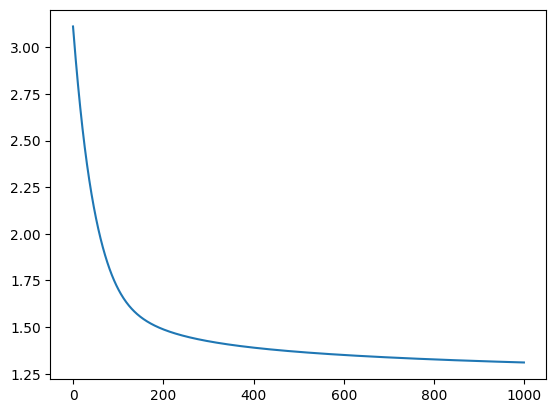

Accuracy on the Train Dataset 43.31 %
Accuracy on the Validation Dataset 42.68 %


In [9]:
# %% -------------  PART A -------------------
#Train NN models to obtain the accuracy on the test data using your training and validation data.
#Simple Neural Network from Scratch with One Hidden Layer 
#Forward and backward propogation are to be implemented in detail 


#activation functions  Activatiefuncties helpen om niet-lineariteit aan het model toe te voegen en bepalen hoe signalen door het netwerk gaan.
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x): #Wordt gebruikt bij output laag
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

#derivatives - activation functions - to be used in backward progation of errors 
#Deze worden gebruikt in backpropagation om fouten door te geven en het netwerk bij te werken.


def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

#n_x number of features aka input variables
#n_h number of neurons in the hidden layer 
#n_y number of classes 


#definition of parameters (theta) between each input in the input layer, each neuron in the hidden layer, and output in the output layer
def initialize_parameters(n_x, n_h, n_y):
    theta_1 = np.random.randn(n_h, n_x)#*0.1  scaling used for the case of RELU 
    theta0_1 = np.zeros((n_h, 1))
    
    theta_2 = np.random.randn(n_y, n_h)#*0.1  scaling used for the case of RELU 
    theta0_2 = np.zeros((n_y, 1))

#theta_1 verbindt de inputlaag met de verborgen laag.
#theta_2 verbindt de verborgen laag met de outputlaag.
#De biases (theta0_1, theta0_2) worden op nul gezet.
    
    parameters = {
        "theta_1" : theta_1,  
        "theta0_1" : theta0_1, #bias / intercept from the input layer
        "theta_2" : theta_2,
        "theta0_2" : theta0_2 #bias / intercept from the hidden layer
    }
    
    return parameters

def forward_propagation(x, parameters):
    
    theta_1 = parameters['theta_1']
    theta0_1 = parameters['theta0_1']
    theta_2 = parameters['theta_2']
    theta0_2 = parameters['theta0_2']
    
    # !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
    #linear combination of first set of parameters and the inputs 
    x1 = np.dot(theta_1, x) + theta0_1
    xh1 = tanh(x1) #activation function
    #linear combination of the second set of parameteres and the output of the hidden layer
    x2 = np.dot(theta_2, xh1) + theta0_2 #not sure if this has to be x1 or xh1?
    xh2 = softmax(x2) #softmax function at the output layer for the classification task
    
    forward_cache = {
        "x1" : x1,
        "xh1" : xh1,
        "x2" : x2,
        "xh2" : xh2
    }
    
    return forward_cache

def cost_function(xh2, y):
    m = y.shape[1]
    #cross-entropy loss (also in your slides - for multiclass classification with softmax)
    #y * np.log(xh2) --> Log Likelihood function
    # -(1/m)* np.sum --> gemiddelde over alle voorbeelden
    cost = -(1/m)*np.sum(y*np.log(xh2))
    return cost

def backward_prop(x, y, parameters, forward_cache):
    
    theta_1 = parameters['theta_1']
    theta0_1 = parameters['theta0_1']
    theta_2 = parameters['theta_2']
    theta0_2 = parameters['theta0_2']
    
    xh1 = forward_cache['xh1']
    xh2 = forward_cache['xh2']
    
    m = x.shape[1]
    
    dx2 = (xh2 - y)  #output layer with the softmax - partial derivative with respect to x2, this is given to you and have quite some derivations behind 
    #fout in de output laag

    #partial derivative with respect to the second set of parameters based on the error above, aanpassing voor tweede set parameters.
    dtheta_2 = (1/m)*np.dot(dx2, xh1.T)
    dtheta0_2 = (1/m)*np.sum(dx2, axis = 1, keepdims = True)
    
    #error propagated to the hidden layer 
    dx1 = (1/m)*np.dot(theta_2.T, dx2)*derivative_tanh(xh1)  #needs to be tailored to the chosen activation function at the hidden layer
    
    # !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
    #partial derivative with respect to the first set of parameters based on the error above. 
    #Theta wordt dus opnieuw bepaald, om nauwkeurigere berekening uit te kunnen voeren.
    dtheta_1 = (1/m) * np.dot(dx1, x.T)
    dtheta0_1 = (1/m)*np.sum(dx1, axis = 1, keepdims = True)
    
    gradients = {
        "dtheta_1" : dtheta_1,
        "dtheta0_1" : dtheta0_1,
        "dtheta_2" : dtheta_2,
        "dtheta0_2" : dtheta0_2
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    
    theta_1 = parameters['theta_1']
    theta0_1 = parameters['theta0_1']
    theta_2 = parameters['theta_2']
    theta0_2 = parameters['theta0_2']
    
    dtheta_1 = gradients['dtheta_1']
    dtheta0_1 = gradients['dtheta0_1']
    dtheta_2 = gradients['dtheta_2']
    dtheta0_2 = gradients['dtheta0_2']
    
    #update of the first and second set of parameters based on the partial derivatives (gradients) and the learning rate
    theta_1 = theta_1 - learning_rate*dtheta_1
    theta0_1 = theta0_1 - learning_rate*dtheta0_1
    theta_2 = theta_2 - learning_rate*dtheta_2
    theta0_2 = theta0_2 - learning_rate*dtheta0_2
    
    parameters = {
        "theta_1" : theta_1,
        "theta0_1" : theta0_1,
        "theta_2" : theta_2,
        "theta0_2" : theta0_2
    }
    
    return parameters

def NN_singleHiddenLayer(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['xh2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

iterations = 1000
n_h = 10
learning_rate = 0.05
Parameters, Cost_list = NN_singleHiddenLayer(X_train.T, y_train_oh.T, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

#accuracy function based on a test/validation dataset 
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    y_out = forward_cache['xh2']   # containes propabilities with shape(6, 1)
    y_out = np.argmax(y_out, 0)  # 0 represents row wise 
    labels = np.argmax(labels, 0)
    acc = np.mean(y_out == labels)*100
    
    return acc

print("Accuracy on the Train Dataset", round(accuracy(X_train.T, y_train_oh.T, Parameters),2), "%")
print("Accuracy on the Validation Dataset", round(accuracy(X_val.T, y_val_oh.T, Parameters), 2), "%")

In [10]:
# %% -------------  PART B -------------------
#Now Train NN models using SKLEARN 
#Logistic regression (that can handle multi class classification) is provided for you. 

#Missing parts that you need to implement to answer the question are indicated below (with "Implement!")


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_logreg = LogisticRegression(random_state=0,max_iter = 200).fit(X_train,y_train)

# !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
# Train a Neural Network
train_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=500, learning_rate_init= 0.0001)
train_nn.fit(X_train, y_train)


pred_logreg = train_logreg.predict(X_val)
print("For Logistic Regression: ")
print(classification_report(y_val, pred_logreg))
print ("Accuracy of logistic regression on the initial data is: ",accuracy_score(pred_logreg,y_val))

# !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
#Predict based on the trained Neural Network using the validation data
#NOTE: You should reach a NN which has a better accuracy than the logistic regression, if  not revisit the specification of your NN

pred_nn = train_nn.predict(X_val)
print("For Neural Network: ")
print(classification_report(y_val, pred_nn))
print ("Accuracy of NN on the initial data is: ",accuracy_score(pred_nn,y_val))

For Logistic Regression: 
              precision    recall  f1-score   support

           0       0.45      0.05      0.08       444
           1       0.46      0.40      0.43       968
           2       0.35      0.48      0.41      1025
           3       0.33      0.17      0.22         6
           4       0.60      0.69      0.64       109
           5       0.54      0.63      0.58       923

    accuracy                           0.45      3475
   macro avg       0.46      0.40      0.39      3475
weighted avg       0.45      0.45      0.43      3475

Accuracy of logistic regression on the initial data is:  0.44805755395683455
For Neural Network: 
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       444
           1       0.68      0.74      0.71       968
           2       0.71      0.67      0.69      1025
           3       0.40      0.33      0.36         6
           4       0.76      0.81      0.78       109
        

c:\Users\hilde\Anaconda\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# %% -------------  PART C -------------------
#We can also extract features such as minute, hour and day from timestamp column as it was not used till now and try to improve the above accuracies

#Feature Extraction from Timestamp column
db.head()
db['Start Time'] = db['Start Time'].astype('datetime64[ns]')
db['hour'] = db['Start Time'].dt.hour
db['minute'] = db['Start Time'].dt.minute
db['day'] = db['Start Time'].dt.day
db.head()

#Again training the classifiers
X = db.iloc[:,4:]
y = db['Class']
#label encoding is done as model accepts only numeric values
# so strings need to be converted into labels
LE = preprocessing.LabelEncoder()
LE.fit(y)
y = LE.transform(y)

In [12]:
print(X.columns)  # Hiermee controleer je of 'hour', 'minute' en 'day' aanwezig zijn, dus ja die zijn toegevoegd aan de dataset

Index(['xmin', 'ymin', 'zmin', 'xmax', 'ymax', 'zmax', 'xmean', 'ymean',
       'zmean', 'xstd', 'ystd', 'zstd', 'hour', 'minute', 'day'],
      dtype='object')


In [13]:
#splitting dataset into train, validation and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [14]:
# Convert the y variable into one-hot encoding - basically the true label will be 1 and all others will be assigned to 0
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

y_train_oh = one_hot(y_train, len(np.unique(y)))
y_val_oh = one_hot(y_val, len(np.unique(y)))
y_test_oh = one_hot(y_test, len(np.unique(y)))

In [15]:
print(y_train)
print(y_train_oh)

[2 1 1 ... 2 1 2]
[[0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [20]:
train_logreg2 = LogisticRegression(random_state=0,max_iter = 200).fit(X_train,y_train)

# !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
#Train a NN with more features as explained above 
train_nn2 = MLPClassifier(hidden_layer_sizes=(30,30), activation='relu', solver='lbfgs', random_state=0, max_iter=1000)
train_nn2.fit(X_train, y_train)

pred_logreg2 = train_logreg2.predict(X_val)
print("For Logistic Regression: ")
print(classification_report(y_val, pred_logreg2))
print ("Accuracy of logistic regression on the extended data is: ",accuracy_score(pred_logreg2,y_val))

# !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
# Predict based on the trained NN using the validation data
#NOTE: Again you should reach a NN which has a better accuracy than the logistic regression, if  not revisit the specification of your NN

pred_nn2 = train_nn2.predict(X_val)
print("For Neural Network: ")
print(classification_report(y_val, pred_nn2))
print ("Accuracy of NN on the extended data is: ",accuracy_score(pred_nn2,y_val))

For Logistic Regression: 
              precision    recall  f1-score   support

           0       0.37      0.04      0.07       444
           1       0.51      0.54      0.52       968
           2       0.46      0.52      0.49      1025
           3       0.29      0.33      0.31         6
           4       0.60      0.64      0.62       109
           5       0.54      0.66      0.59       923

    accuracy                           0.50      3475
   macro avg       0.46      0.45      0.43      3475
weighted avg       0.49      0.50      0.47      3475

Accuracy of logistic regression on the extended data is:  0.5018705035971223
For Neural Network: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       444
           1       0.92      0.92      0.92       968
           2       0.91      0.88      0.89      1025
           3       0.71      0.83      0.77         6
           4       0.96      0.98      0.97       109
        

c:\Users\hilde\Anaconda\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
# %% -------------  PART D -------------------
#Accuracy of the models should increase by using additional features
#Pick the one with the highest accuracy and apply it to the test data. 

# !!!!!!! IMPLEMENT !!!!!!!!!!!!!!!!
#NOTE you should reach an accuracy of at least 80% so revisit your models if you cannot reach that. 

final_res = train_nn2.predict(X_test)
print ("Accuracy of the chosen Classifier is: ",accuracy_score(final_res,y_test))

Accuracy of the chosen Classifier is:  0.7741007194244605
